# Красивая картинка, очень неудобный график и никаких исходных данных.

In [1]:
import numpy as np
import cv2
from PIL import Image

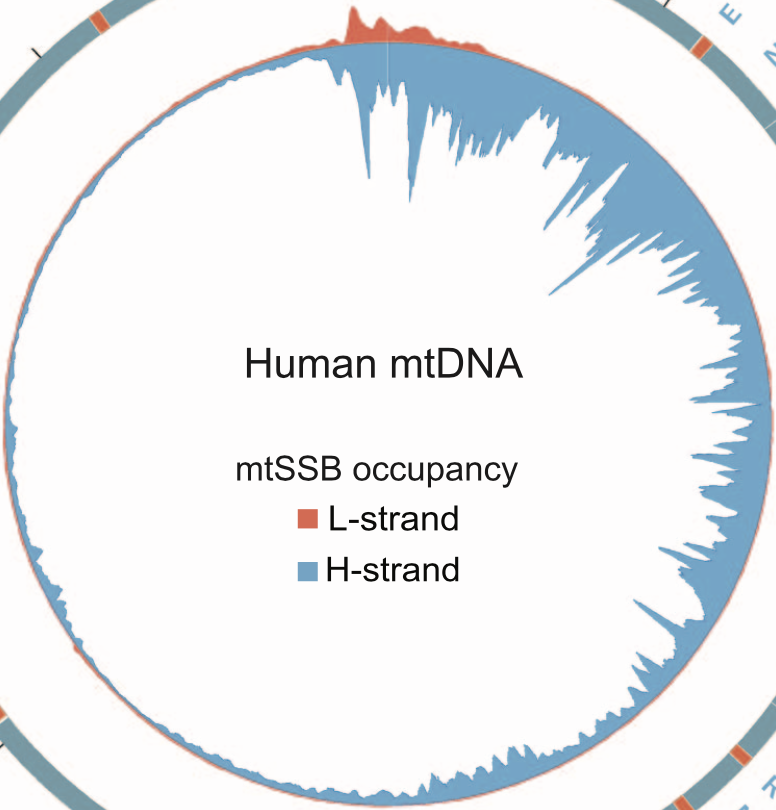

In [2]:
Image.open('img.png')

In [3]:
image = cv2.imread('img.png')

In [4]:
th, bw = cv2.threshold(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), 127,255, cv2.THRESH_OTSU)

In [5]:
th

199.0

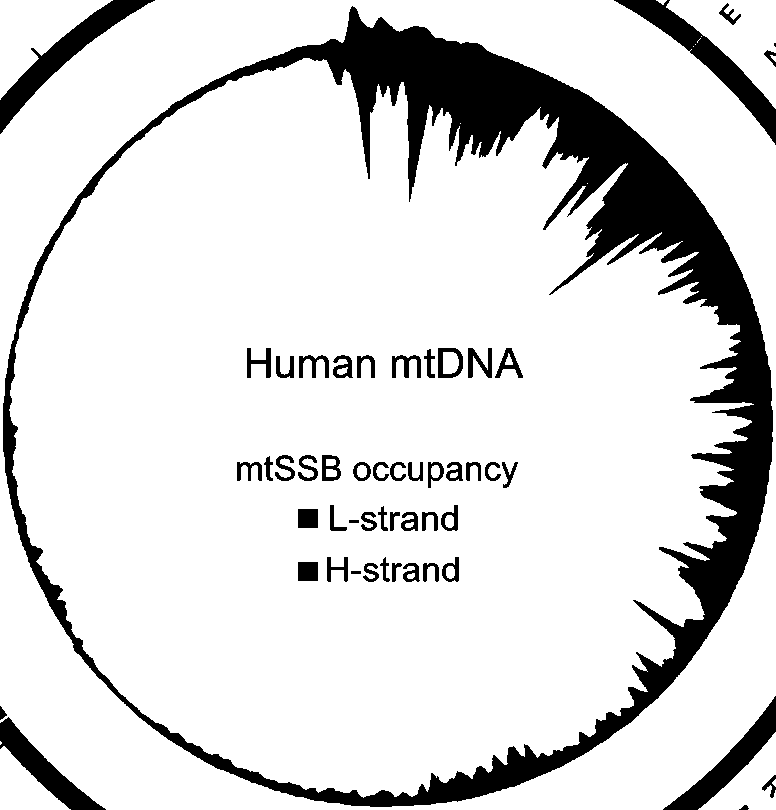

In [6]:
Image.fromarray(bw)

In [7]:
contours = cv2.findContours(bw, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

In [8]:
areas = list(map(cv2.contourArea, contours[0]))

In [9]:
np.argsort(areas)

array([59, 66, 60, 63, 64, 65, 58,  2,  0, 62, 70, 26,  4, 15, 51,  5, 16,
       45, 40, 27, 28,  6, 17, 29,  9, 20, 13, 23, 41, 31, 36, 37, 53, 68,
       35, 25, 32, 30, 10,  7, 18, 21, 48, 46,  8, 33, 19, 52, 38, 14, 43,
       44, 39, 34, 12, 24, 49, 50, 57, 11, 47, 54, 22, 55, 42, 56,  1,  3,
       72, 69, 61, 67, 71])

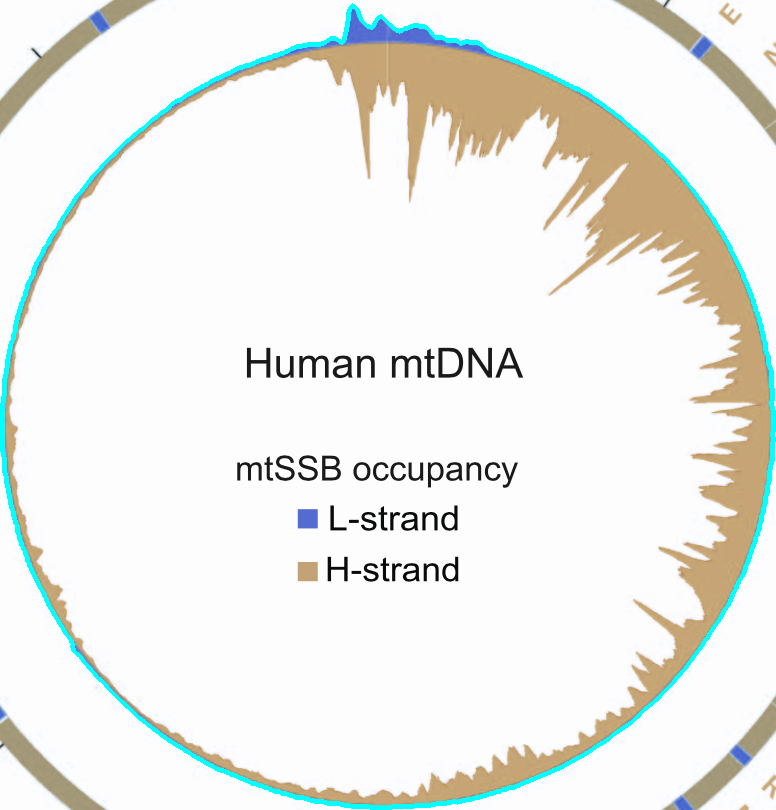

In [10]:
Image.fromarray(cv2.drawContours(image.copy(), contours[0], 67, (0,255,255), 4 ))

In [11]:
circle_contour = contours[0][67]

In [12]:
circle_contour = circle_contour.squeeze()

In [13]:
xmin = np.min(circle_contour[:,0])
xmax = np.max(circle_contour[:,0])
ymin = np.min(circle_contour[:,1])
ymax = np.max(circle_contour[:,1])

In [14]:
circle_image = image[ymin+35:ymax-1, xmin:xmax]

In [15]:

circle_image[
    circle_image.shape[1] // 2 -  170: circle_image.shape[1] // 2 +  170,
    circle_image.shape[0] // 2 -  150: circle_image.shape[0] // 2 +  150
] = 255

# circle_image[
#     circle_image.shape[1] // 2 -  5: circle_image.shape[1] // 2 +  5,
#     circle_image.shape[0] // 2 -  5: circle_image.shape[0] // 2 + 5
# ] = 0

print(circle_image.shape[1] // 2)

385


In [16]:
circle_image.shape

(766, 771, 3)

In [17]:
r = 382
lines = []
for angle in np.linspace(-np.pi/2, 3*np.pi/2, 8000):
    circle_image[
        np.clip(int(np.cos(angle)*r) + 383, 0, circle_image.shape[0]-1), 
        int(np.sin(angle) * r) + 385
    ] = 0
    lines.append(((383, 385),
                 (np.clip(int(np.cos(angle)*r) + 383, 0, circle_image.shape[0]-1), 
                int(np.sin(angle) * r) + 385)
                 ) )

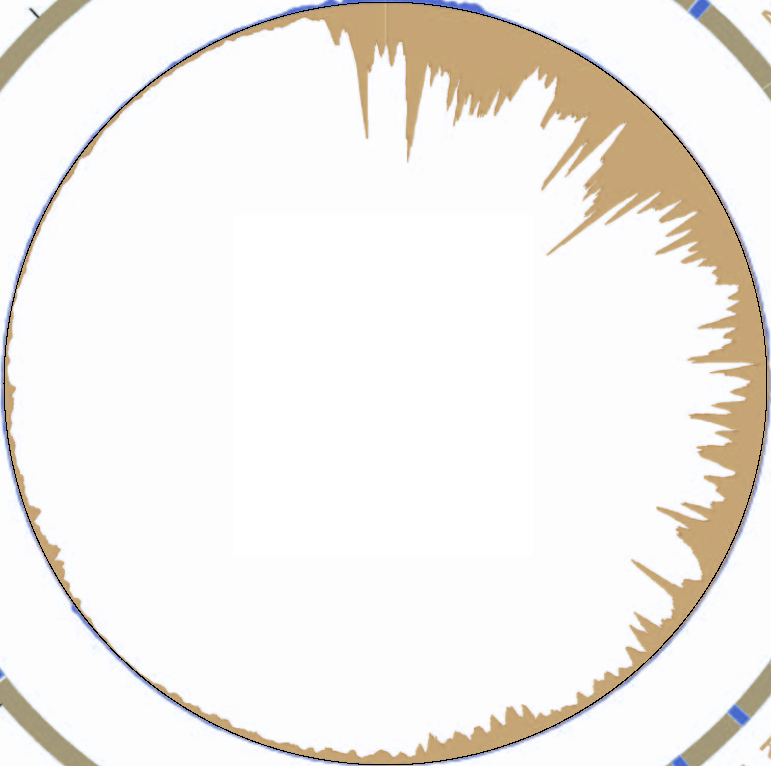

In [18]:
Image.fromarray(circle_image)

In [19]:
th, bw = cv2.threshold(cv2.cvtColor(circle_image, cv2.COLOR_BGR2GRAY), 127, 255, cv2.THRESH_OTSU)

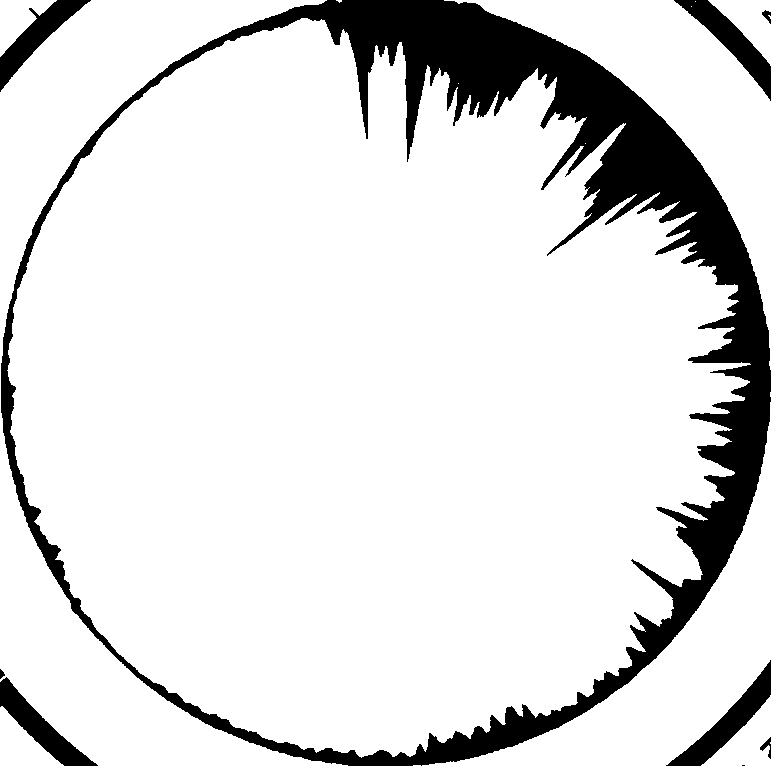

In [20]:
Image.fromarray(bw)

In [21]:
lines[0]

((383, 385), (383, 3))

In [22]:
canvas_bw = bw.copy()
for line in lines[::10]:
    for l in np.linspace(0,1, 200):
        x = np.clip( int(line[0][0] * l + line[1][0] *(1-l)), 0, canvas_bw.shape[1]-1)
        y = np.clip(int(line[0][1]*l + line[1][1] * ( 1 - l)), 0, canvas_bw.shape[0] -1)
        canvas_bw[y,x ] = 0

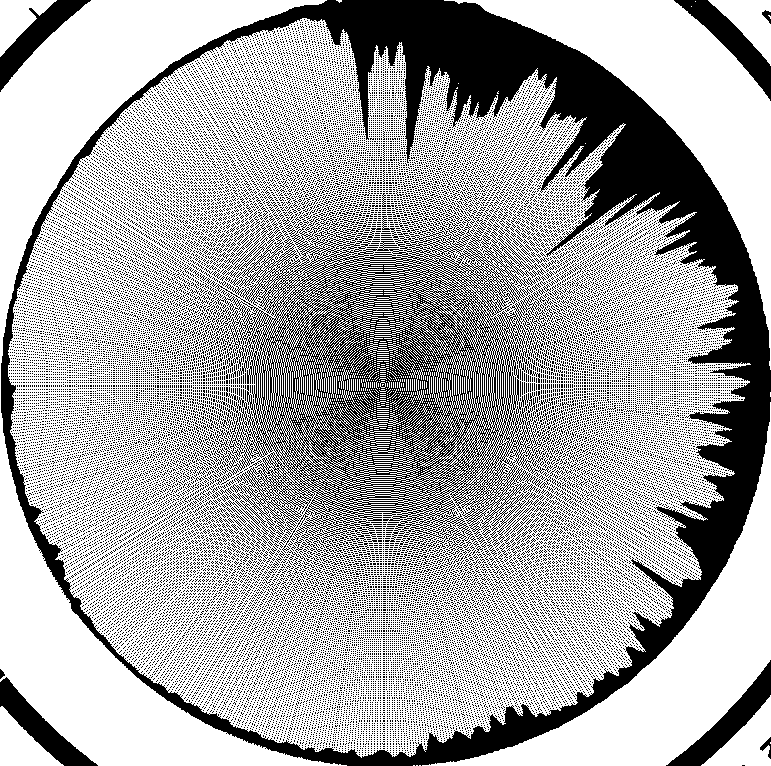

In [23]:
Image.fromarray(canvas_bw)

In [24]:
canvas_bw = bw.copy()
vals = []
for line in lines:
    for l in np.linspace(0,1, 200):
        x = np.clip( int(line[0][0] * (1-l) + line[1][0] *(l)), 0, canvas_bw.shape[1]-1)
        y = np.clip(int(line[0][1]*(1-l) + line[1][1] * (l)), 0, canvas_bw.shape[0] -1)
        if bw[y,x] == 0:
            vals.append(1 - l)
            break

In [25]:
vals = np.array(vals)

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

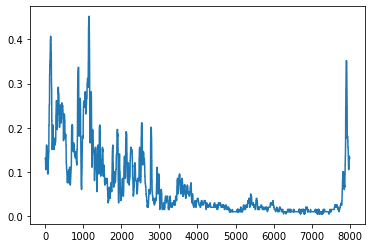

In [27]:
plt.plot(vals)

In [28]:
np.savetxt('mtdna.values', vals, fmt='%.5f', delimiter=' ', newline='\n')

Данные получились в "попугаях" - доли черного цвета на радиусе от центра до окружности.